# 1. Install Library

In [2]:
#!pip install morphoTreeAdjust==0.0.6
#!pip install PrettyPrintTree

In [3]:
import numpy as np
def imprime(n):
	X = np.linspace(0, 10000, n+1)
	s = "teste.push_back( std::vector<int>{"
	for x in X:
		if x != 0:
			s += str(int(x))
		if x != 0 and x != 200:
			s += ", "
	return s+"});"

for i in range(20):
	print(imprime(i))

teste.push_back( std::vector<int>{});
teste.push_back( std::vector<int>{10000, });
teste.push_back( std::vector<int>{5000, 10000, });
teste.push_back( std::vector<int>{3333, 6666, 10000, });
teste.push_back( std::vector<int>{2500, 5000, 7500, 10000, });
teste.push_back( std::vector<int>{2000, 4000, 6000, 8000, 10000, });
teste.push_back( std::vector<int>{1666, 3333, 5000, 6666, 8333, 10000, });
teste.push_back( std::vector<int>{1428, 2857, 4285, 5714, 7142, 8571, 10000, });
teste.push_back( std::vector<int>{1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000, });
teste.push_back( std::vector<int>{1111, 2222, 3333, 4444, 5555, 6666, 7777, 8888, 10000, });
teste.push_back( std::vector<int>{1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, });
teste.push_back( std::vector<int>{909, 1818, 2727, 3636, 4545, 5454, 6363, 7272, 8181, 9090, 10000, });
teste.push_back( std::vector<int>{833, 1666, 2500, 3333, 4166, 5000, 5833, 6666, 7500, 8333, 9166, 10000, });
teste.push_back( std::vector

# 2. Importing library

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import morphoTreeAdjust as mta

from PrettyPrint import PrettyPrintTree
from colorama import Fore, Back

printTree = PrettyPrintTree(
    lambda node: node.children,
    lambda node: (str(node.id) + ": "+str(node.level)), color=Back.BLACK + Fore.WHITE)


# 3. Creating the mintree and maxtree of an input image

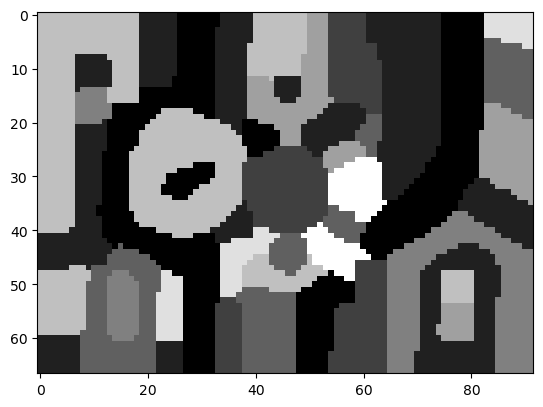

In [9]:
img_f = np.array([
    [6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,6,6,6,6,6,6,6,6,6,6,5,5,5,5,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,7,7,7,7,7,7,7,7,7],
    [6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,6,6,6,6,6,6,6,6,6,6,5,5,5,5,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,7,7,7,7,7,7,7,7,7],
    [6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,6,6,6,6,6,6,6,6,6,6,5,5,5,5,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,7,7,7,7,7,7,7,7,7],
    [6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,6,6,6,6,6,6,6,6,6,6,5,5,5,5,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,7,7,7,7,7,7,7,7,7],
    [6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,6,6,6,6,6,6,6,6,6,6,5,5,5,5,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,7,7,7,7,7,7,7,7,7],
    [6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,6,6,6,6,6,6,6,6,6,6,5,5,5,5,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3,3,3,7,7,7,7,7,7],
    [6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,7,7],
    [6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3],
    [6,6,6,6,6,6,6,1,1,1,1,1,1,6,6,6,6,6,6,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3],
    [6,6,6,6,6,6,6,1,1,1,1,1,1,1,6,6,6,6,6,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3],
    [6,6,6,6,6,6,6,1,1,1,1,1,1,1,6,6,6,6,6,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3],
    [6,6,6,6,6,6,6,1,1,1,1,1,1,1,6,6,6,6,6,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3],
    [6,6,6,6,6,6,6,1,1,1,1,1,1,1,6,6,6,6,6,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,5,5,5,5,6,1,1,1,1,1,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3],
    [6,6,6,6,6,6,6,1,1,1,1,1,1,1,6,6,6,6,6,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,5,5,5,5,5,1,1,1,1,1,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3],
    [6,6,6,6,6,6,6,1,4,4,4,4,4,6,6,6,6,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,5,5,5,5,5,1,1,1,1,1,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3],
    [6,6,6,6,6,6,6,4,4,4,4,4,4,6,6,6,6,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,5,5,5,5,5,1,1,1,1,1,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3],
    [6,6,6,6,6,6,6,4,4,4,4,4,4,6,6,6,6,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,5,5,5,5,5,5,1,1,1,5,5,5,5,5,5,5,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3],
    [6,6,6,6,6,6,6,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,1,1,1,1,1,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,5,5,5,3,3,3,3,3,3],
    [6,6,6,6,6,6,6,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,6,6,6,6,6,6,0,0,0,0,1,1,1,1,1,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,5,5,5,5,5,3,3,3,3],
    [6,6,6,6,6,6,6,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,0,0,1,1,1,1,1,1,5,5,5,5,5,5,5,5,5,5,5,5,5,1,1,1,1,1,1,1,1,1,3,3,3,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,3,3],
    [6,6,6,6,6,6,6,4,4,4,4,4,1,0,0,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,1,1,1,1,0,0,0,5,5,5,5,5,5,5,5,5,1,1,1,1,1,1,1,1,1,1,1,3,3,3,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6,1,1,1,1,1,1,0,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,1,0,0,0,0,0,0,5,5,5,5,5,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6,1,1,1,1,1,1,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,0,0,0,0,0,0,0,5,5,5,5,1,1,1,1,1,1,1,1,1,1,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6,1,1,1,1,1,1,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,0,0,0,0,0,0,5,5,5,5,1,1,1,1,1,1,1,1,1,1,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6,1,1,1,1,1,1,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,0,0,0,0,0,0,5,5,5,5,1,1,1,1,1,1,1,5,5,5,5,3,3,3,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6,1,1,1,1,1,1,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,0,0,0,0,2,2,2,2,2,2,1,1,1,1,5,5,5,5,5,5,5,3,3,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6,1,1,1,1,1,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,0,0,2,2,2,2,2,2,2,2,2,1,1,5,5,5,5,5,5,5,5,3,3,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6,1,1,1,1,1,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,5,5,5,5,5,5,8,8,8,8,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6,1,1,1,1,1,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,0,0,0,0,6,6,6,6,6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,5,5,5,5,8,8,8,8,8,8,8,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6,1,1,1,1,1,0,0,0,0,0,6,6,6,6,6,6,6,6,6,0,0,0,0,0,0,0,6,6,6,6,6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,5,8,8,8,8,8,8,8,8,8,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6,1,1,1,1,1,0,0,0,0,0,6,6,6,6,6,6,6,0,0,0,0,0,0,0,0,0,6,6,6,6,6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,8,8,8,8,8,8,8,8,8,8,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6,1,1,1,1,1,0,0,0,0,0,6,6,6,6,6,6,6,0,0,0,0,0,0,0,0,6,6,6,6,6,6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,8,8,8,8,8,8,8,8,8,8,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,5,5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6,1,1,1,1,1,0,0,0,0,0,6,6,6,6,6,6,0,0,0,0,0,0,0,6,6,6,6,6,6,6,6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,8,8,8,8,8,8,8,8,8,8,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6,1,1,1,1,1,0,0,0,0,0,6,6,6,6,6,6,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,8,8,8,8,8,8,8,8,8,8,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,5,5,5,5],
    [6,6,6,6,6,6,6,1,1,1,1,1,0,0,0,0,0,6,6,6,6,6,6,6,6,0,0,0,6,6,6,6,6,6,6,6,6,6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,8,8,8,8,8,8,8,8,8,8,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,5,5,5],
    [6,6,6,6,6,6,6,1,1,1,1,1,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,8,8,8,8,8,8,8,8,8,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,5],
    [6,6,6,6,6,6,6,1,1,1,1,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,8,8,8,8,8,8,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [6,6,6,6,6,6,6,1,1,1,1,0,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,8,8,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1],
    [6,6,6,6,6,6,6,1,1,1,1,1,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,8,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,1],
    [6,6,6,6,6,6,6,1,1,1,1,1,0,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,8,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,1,1,1,1,1,1,1,1,1],
    [6,6,6,6,6,6,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,1,1,1,1,1,1,1,1,7,7,7,2,2,2,2,2,2,2,8,8,8,8,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,6,6,6,0,0,0,0,1,1,1,1,1,1,1,7,7,7,7,7,3,3,3,3,8,8,8,8,8,8,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,7,7,7,7,7,7,7,7,3,3,3,3,3,3,8,8,8,8,8,8,8,3,3,3,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,7,7,7,7,7,7,7,3,3,3,3,3,3,3,8,8,8,8,8,8,8,8,8,8,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,1,1,1,1,4,4,4,4,4,4,4,4,1,1],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,7,7,7,7,7,7,7,3,3,3,3,3,3,3,8,8,8,8,8,8,8,8,8,8,8,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,1,1,1,1,1,1,1,1,4,4,4,4,4,4,4,4],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,7,7,7,7,6,6,6,3,3,3,3,3,3,3,6,8,8,8,8,8,8,8,8,8,8,8,0,0,0,4,4,4,4,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,1,4,4,4,4,4,4,4],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,7,7,7,7,7,6,6,6,6,3,3,3,3,3,3,3,6,8,8,8,8,8,8,8,8,2,2,2,2,2,2,4,4,4,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1,4,4,4,4,4,4,4],
    [1,1,1,1,1,1,6,6,6,1,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,7,7,7,7,6,6,6,6,6,6,3,3,3,3,3,6,6,6,6,8,8,8,8,8,8,2,2,2,2,2,2,4,4,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,4,4,4,4],
    [6,6,6,6,6,6,6,6,6,6,3,3,3,3,4,4,4,3,3,3,3,3,3,7,7,0,0,0,0,0,0,0,0,0,7,7,7,7,6,6,6,6,6,6,6,6,3,3,6,6,6,6,6,6,0,8,8,8,8,2,2,2,2,2,2,4,4,4,4,4,4,1,1,1,1,6,6,6,6,6,6,1,1,1,1,1,4,4,4,4,4,4],
    [6,6,6,6,6,6,6,6,6,6,3,3,3,4,4,4,4,4,3,3,3,3,3,7,7,7,7,0,0,0,0,0,0,0,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,0,0,0,0,8,8,2,2,2,2,2,2,4,4,4,4,4,4,1,1,1,1,6,6,6,6,6,6,1,1,1,1,1,4,4,4,4,4,4],
    [6,6,6,6,6,6,6,6,6,3,3,3,3,4,4,4,4,4,4,3,3,3,3,7,7,7,7,0,0,0,0,0,0,0,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,0,0,0,0,0,0,0,0,2,2,2,2,2,2,4,4,4,4,4,4,1,1,1,1,6,6,6,6,6,6,1,1,1,1,1,4,4,4,4,4,4],
    [6,6,6,6,6,6,6,6,6,3,3,3,3,4,4,4,4,4,4,3,3,3,3,7,7,7,7,0,0,0,0,0,0,0,7,7,7,7,3,3,3,3,3,6,6,6,6,6,6,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,4,4,4,4,4,4,1,1,1,1,6,6,6,6,6,6,1,1,1,1,1,4,4,4,4,4,4],
    [6,6,6,6,6,6,6,6,6,3,3,3,3,4,4,4,4,4,4,3,3,3,7,7,7,7,7,0,0,0,0,0,0,0,7,7,7,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,4,4,4,4,4,4,1,1,1,1,6,6,6,6,6,6,1,1,1,1,1,4,4,4,4,4,4],
    [6,6,6,6,6,6,6,6,6,3,3,3,3,4,4,4,4,4,4,3,3,3,7,7,7,7,7,0,0,0,0,0,0,0,2,2,2,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,4,4,4,4,4,4,1,1,1,1,6,6,6,6,6,6,1,1,1,1,4,4,4,4,4,4,4],
    [6,6,6,6,6,6,6,6,6,3,3,3,3,4,4,4,4,4,4,3,3,3,7,7,7,7,7,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,1,1,1,1,5,5,5,5,5,5,1,1,1,1,4,4,4,4,4,4,4],
    [6,6,6,6,6,6,6,6,6,3,3,3,3,4,4,4,4,4,4,3,3,3,7,7,7,7,7,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,1,1,1,1,5,5,5,5,5,5,1,1,1,1,4,4,4,4,4,4,4],
    [6,6,6,6,6,6,6,6,6,3,3,3,3,4,4,4,4,4,4,3,3,3,7,7,7,7,7,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,1,1,1,1,5,5,5,5,5,5,1,1,1,1,4,4,4,4,4,4,4],
    [6,6,6,6,6,6,6,6,6,3,3,3,3,4,4,4,4,4,4,3,3,3,7,7,7,7,7,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,1,1,1,1,5,5,5,5,5,5,1,1,1,1,4,4,4,4,4,4,4],
    [6,6,6,6,6,6,6,6,6,3,3,3,3,4,4,4,4,4,4,3,3,3,7,7,7,7,7,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,1,1,1,5,5,5,5,5,5,5,1,1,1,1,4,4,4,4,4,4,4],
    [6,6,6,6,6,6,6,6,3,3,3,3,3,4,4,4,4,4,4,3,3,3,7,7,7,7,7,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,1,1,1,5,5,5,5,5,5,5,1,1,1,1,4,4,4,4,4,4,4],
    [1,1,1,1,1,1,1,1,3,3,3,3,3,3,4,4,4,4,3,3,3,3,7,7,7,7,7,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,1,1,1,1,5,5,5,5,5,5,1,1,1,1,4,4,4,4,4,4,4],
    [1,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,4,4,4,4,4],
    [1,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,4,4,4,4,4],
    [1,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,4,4,4,4,4],
    [1,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,4,4,4,4,4],
    [1,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,4,4,4,4,4],
    [1,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,4,4,4,4,4],
])


num_rows, num_cols = img_f.shape
img_f_vector = img_f.ravel()

maxtree = mta.ComponentTree(img_f_vector, num_rows, num_cols, True, 1.5)
mintree = mta.ComponentTree(img_f_vector, num_rows, num_cols, False, 1.5)
plt.imshow(img_f, cmap='gray')

Upper and lower level sets where in black are foreground pixels and white are background pixels


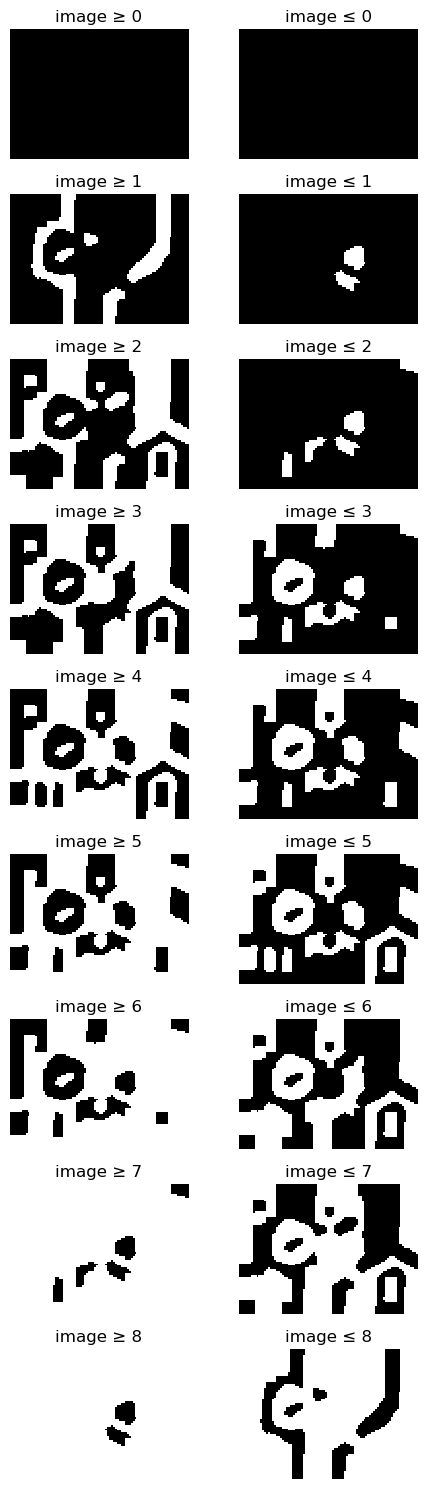

In [10]:
print("Upper and lower level sets where in black are foreground pixels and white are background pixels")

# Criação dos subplots com duas colunas
fig, axes = plt.subplots(9, 2, figsize=(5, 15))
t_values = range(0,9)

# Preenchendo os subplots com imagens limiares
for i, t in enumerate(t_values):
    # Primeira coluna: img_f >= t
    img_threshold_ge = img_f >= t
    axes[i, 0].imshow(8-img_threshold_ge, cmap='gray', interpolation='nearest')
    axes[i, 0].set_title(f'image ≥ {t}')
    axes[i, 0].axis('off')

    # Segunda coluna: img_f <= t
    img_threshold_le = img_f <= (8 - t)
    axes[i, 1].imshow(8-img_threshold_le, cmap='gray', interpolation='nearest')
    axes[i, 1].set_title(f'image ≤ {t}')
    axes[i, 1].axis('off')

# Ajuste de layout para evitar sobreposição
plt.tight_layout()
plt.show()



Maxtree of the input image
                                              0: 0 
                  ┌────────────────────────────┴────────────────────────────┐
                 1: 1                                                      2: 1                      
          ┌───────┴───────┐                             ┌───────────────────┴────────┬───────────┐   
         6: 3            7: 4                          3: 2                         4: 3       13: 5 
  ┌───────┼───────┐       |             ┌───────────────┴┬───────┬───────┐       ┌───┴───┐       |   
 9: 4   18: 6   22: 7   14: 6          5: 3             8: 4   10: 5   16: 6   11: 5   20: 7   19: 6 
                                  ┌─────┴─────┐                  |                                   
                                12: 5       17: 6              15: 6                                 
                                  |       ┌───┴───┐                                                  
                           

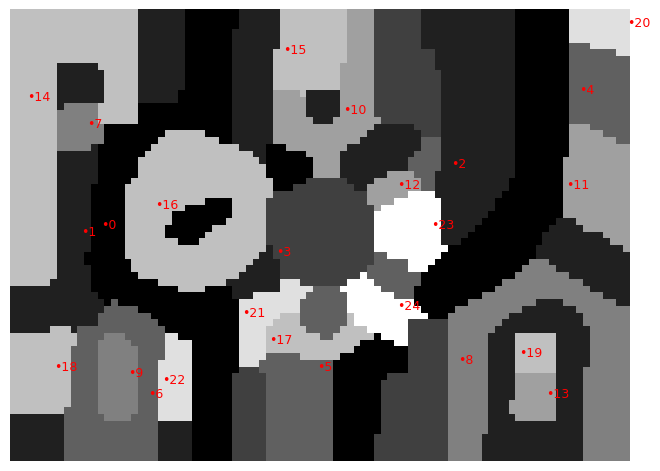

In [11]:
print("Maxtree of the input image")
printTree(maxtree.root)

idsPixel_maxtree = []
for node in maxtree.root.postOrderTraversal():
  index = node.cnps[len(node.cnps)//2]
  px = index // num_cols
  py = index % num_cols
  idsPixel_maxtree.append((node.id, px, py))

# Plota a imagem
plt.figure(figsize=(8, 6))
plt.imshow(img_f, cmap='gray')

# Adiciona rótulos nos centróides fictícios
for i, (id, x, y) in enumerate(idsPixel_maxtree):
    plt.text(y, x, f'•{id}', color='red', fontsize=9)

plt.axis('off')
plt.show()

Mintree of the input image
                                                               0: 8 
                                                                |
                                                               1: 7 
                                                                |
                                                               2: 6 
                                                       ┌────────┴─────────┐
                                                      3: 5              17: 0 
                                             ┌─────────┴──────────┐           
                                            4: 4                10: 1         
                                ┌────────────┴────┬───────┐                   
                               5: 3              9: 1   12: 1                 
                     ┌──────────┴──────────┐                                  
                    6: 2                 13: 1                                
     

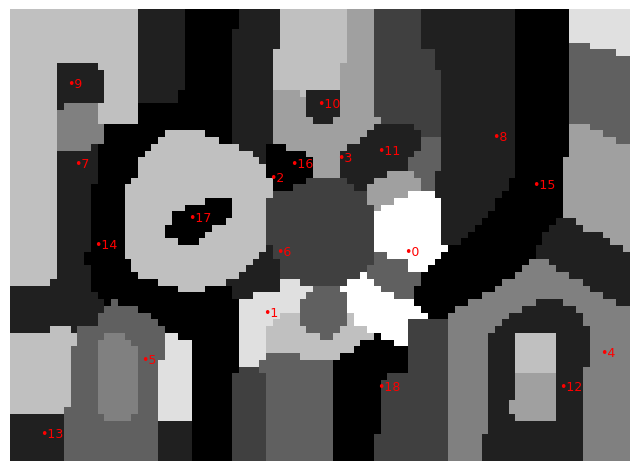

In [12]:
print("Mintree of the input image")
printTree(mintree.root)


idsPixel_mintree = []
for node in mintree.root.postOrderTraversal():
  index = node.cnps[len(node.cnps)//2]
  px = index // num_cols
  py = index % num_cols
  idsPixel_mintree.append((node.id, px, py))

# Plota a imagem
plt.figure(figsize=(8, 6))
plt.imshow(img_f, cmap='gray')

# Adiciona rótulos nos centróides fictícios
for i, (id, x, y) in enumerate(idsPixel_mintree):
    plt.text(y, x, f'•{id}', color='red', fontsize=9)

plt.axis('off')
plt.show()


# 4. Pruning an leaf of the maxtree and adjusting the mintree

leaf of maxtree of input image: (id:level) = (19: 6)


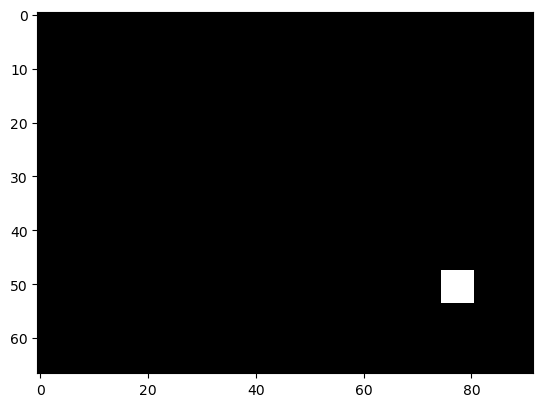

In [14]:
leaves = maxtree.leaves()
Lmax = leaves[0]
plt.imshow(maxtree.recNode(Lmax).reshape(num_rows, num_cols), cmap='gray')
print(f'leaf of maxtree of input image: (id:level) = ({Lmax.id}: {Lmax.level})')

In [15]:
#first adjust the mintree
adjust = mta.ComponentTreeAdjustment(mintree, maxtree)

flatZone = Lmax.cnps
newGrayLevel = Lmax.level
type_tree = False #False=mintree and True=maxtree
(mapF, B_L) = adjust.buildCollections(mintree, flatZone, newGrayLevel, type_tree)

maxIndex: 25


In [25]:
mapF, B_L

({6: [<morphoTreeAdjust.NodeCT at 0x7fdea9c7ceb0>]}, [])

In [ ]:

adjust.updateTree(mintree, Lmax)

#after, pruning the maxtree
maxtree.prunning(Lmax)

#reconstructed images of both trees
img_g_vector_maxtree = maxtree.reconstructionImage()
img_g_vector_mintree = mintree.reconstructionImage()

print("The reconstruction images are equals?", (img_g_vector_maxtree == img_g_vector_mintree).all() )

Text(0.5, 1.0, 'reconstructed images: mintree')

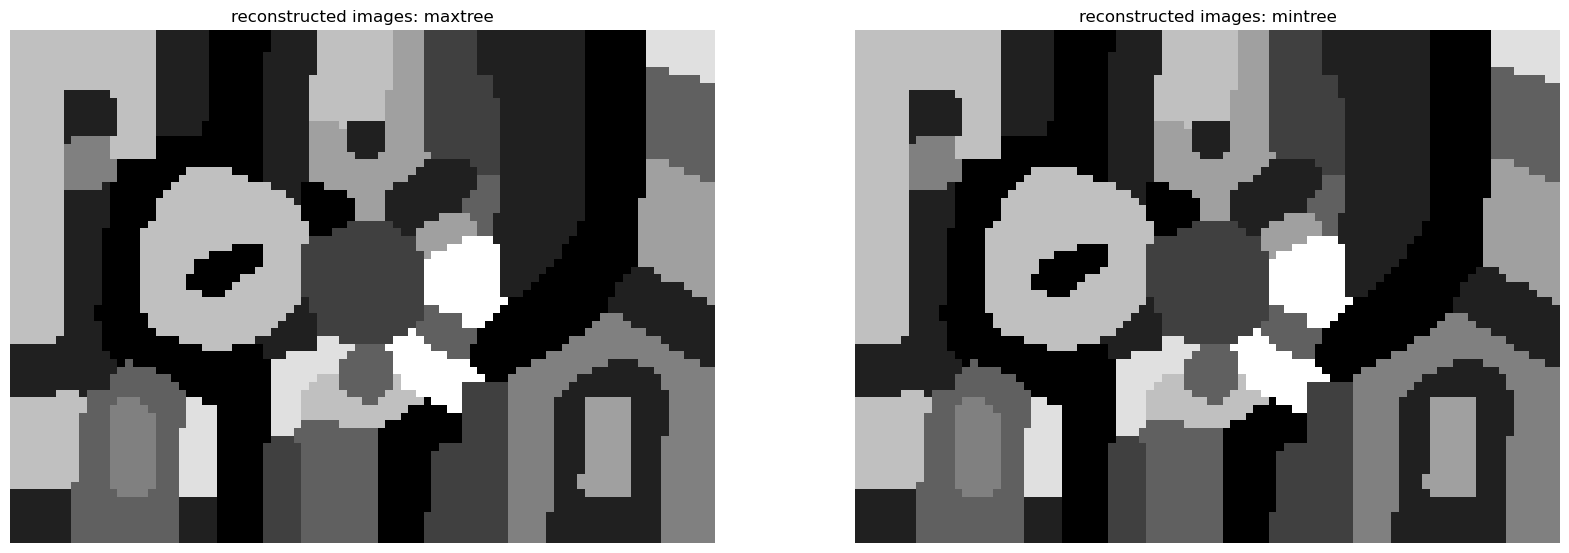

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))

axs[0].axis('off')
axs[0].imshow(img_g_vector_maxtree.reshape(num_rows, num_cols), cmap='gray')
axs[0].set_title('reconstructed images: maxtree')

axs[1].axis('off')
axs[1].imshow(img_g_vector_mintree.reshape(num_rows, num_cols), cmap='gray')
axs[1].set_title('reconstructed images: mintree')


In [15]:
print("Maxtree of the filtered image")
printTree(maxtree.root)
maxtree.numNodes

Maxtree of the filtered image
                                              0: 0 
                  ┌────────────────────────────┴────────────────────────────┐
                 1: 1                                                      2: 1                      
          ┌───────┴───────┐                             ┌───────────────────┴────────┬───────────┐   
         6: 3            7: 4                          3: 2                         4: 3       13: 5 
  ┌───────┼───────┐       |             ┌───────────────┴┬───────┬───────┐       ┌───┴───┐           
 9: 4   18: 6   22: 7   14: 6          5: 3             8: 4   10: 5   16: 6   11: 5   20: 7         
                                  ┌─────┴─────┐                  |                                   
                                12: 5       17: 6              15: 6                                 
                                  |       ┌───┴───┐                                                  
                        

24

In [16]:
print("Mintree of the filtered image")
printTree(mintree.root)
mintree.numNodes

Mintree of the filtered image
                                0: 8 
                                 |
                                1: 7 
                                 |
                                2: 6 
   ┌─────────────────────────────┴─────────────────────────────┐
 17: 0                                                        3: 5            
                                                     ┌─────────┴──────────┐   
                                                    4: 4                10: 1 
                                        ┌────────────┴────┬───────┐           
                                       5: 3              9: 1   12: 1         
                             ┌──────────┴──────────┐                          
                            6: 2                 13: 1                        
               ┌───────────┬─┴─────┬───────┐                                  
              7: 1        8: 1   11: 1   18: 0                                
          

19